## <a id='toc1_1_'></a>[__Пример работы класса `QueteletIndex`__](#toc0_)

**Содержание**<a id='toc0_'></a>
- [__Пример работы класса `QueteletIndex`__](#toc1_1_)
    - [__Постановка задачи__](#toc1_1_1_)
    - [__Инициализация объекта класса `QueteletIndex`__](#toc1_1_2_)
    - [__Как это работает__](#toc1_1_3_)
    - [__Выводы__](#toc1_1_4_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

***
### <a id='toc1_1_1_'></a>[__Постановка задачи__](#toc0_)

Даны объекты с двумя категориальными признаками (в примере — уровень образования `EDUCATION` и индикатор просрочки по кредиту `FAILED`). Выразить связь между категориальными признаками количественно.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,EDUCATION,FAILED
0,бакалавр,1
1,бакалавр,1
2,бакалавр,0
3,бакалавр,0
4,бакалавр,0
...,...,...
29995,выпускник школы,0
29996,выпускник школы,0
29997,бакалавр,1
29998,выпускник школы,1


***
### <a id='toc1_1_2_'></a>[__Инициализация объекта класса `QueteletIndex`__](#toc0_)

Параметры:

* `feature1` — первый категориальный признак. `list | tuple | numpy.ndarray | pandas.Series`.

* `feature2` — второй категориальный признак. `list | tuple | numpy.ndarray | pandas.Series`.

* `names` — имена признаков. Список строк `list[str]`. По умолчанию пустой список.
    * Если имя признака задано явно, используется оно.
    * Если признак задан `pandas`-серией, имеющей не-`None` атрибут `name`, то используется он.
    * Если имя не задано и признак не `pandas`-серия с именем, то автоматически назначается дженерик-имя `feature #1` или `feature #2`.

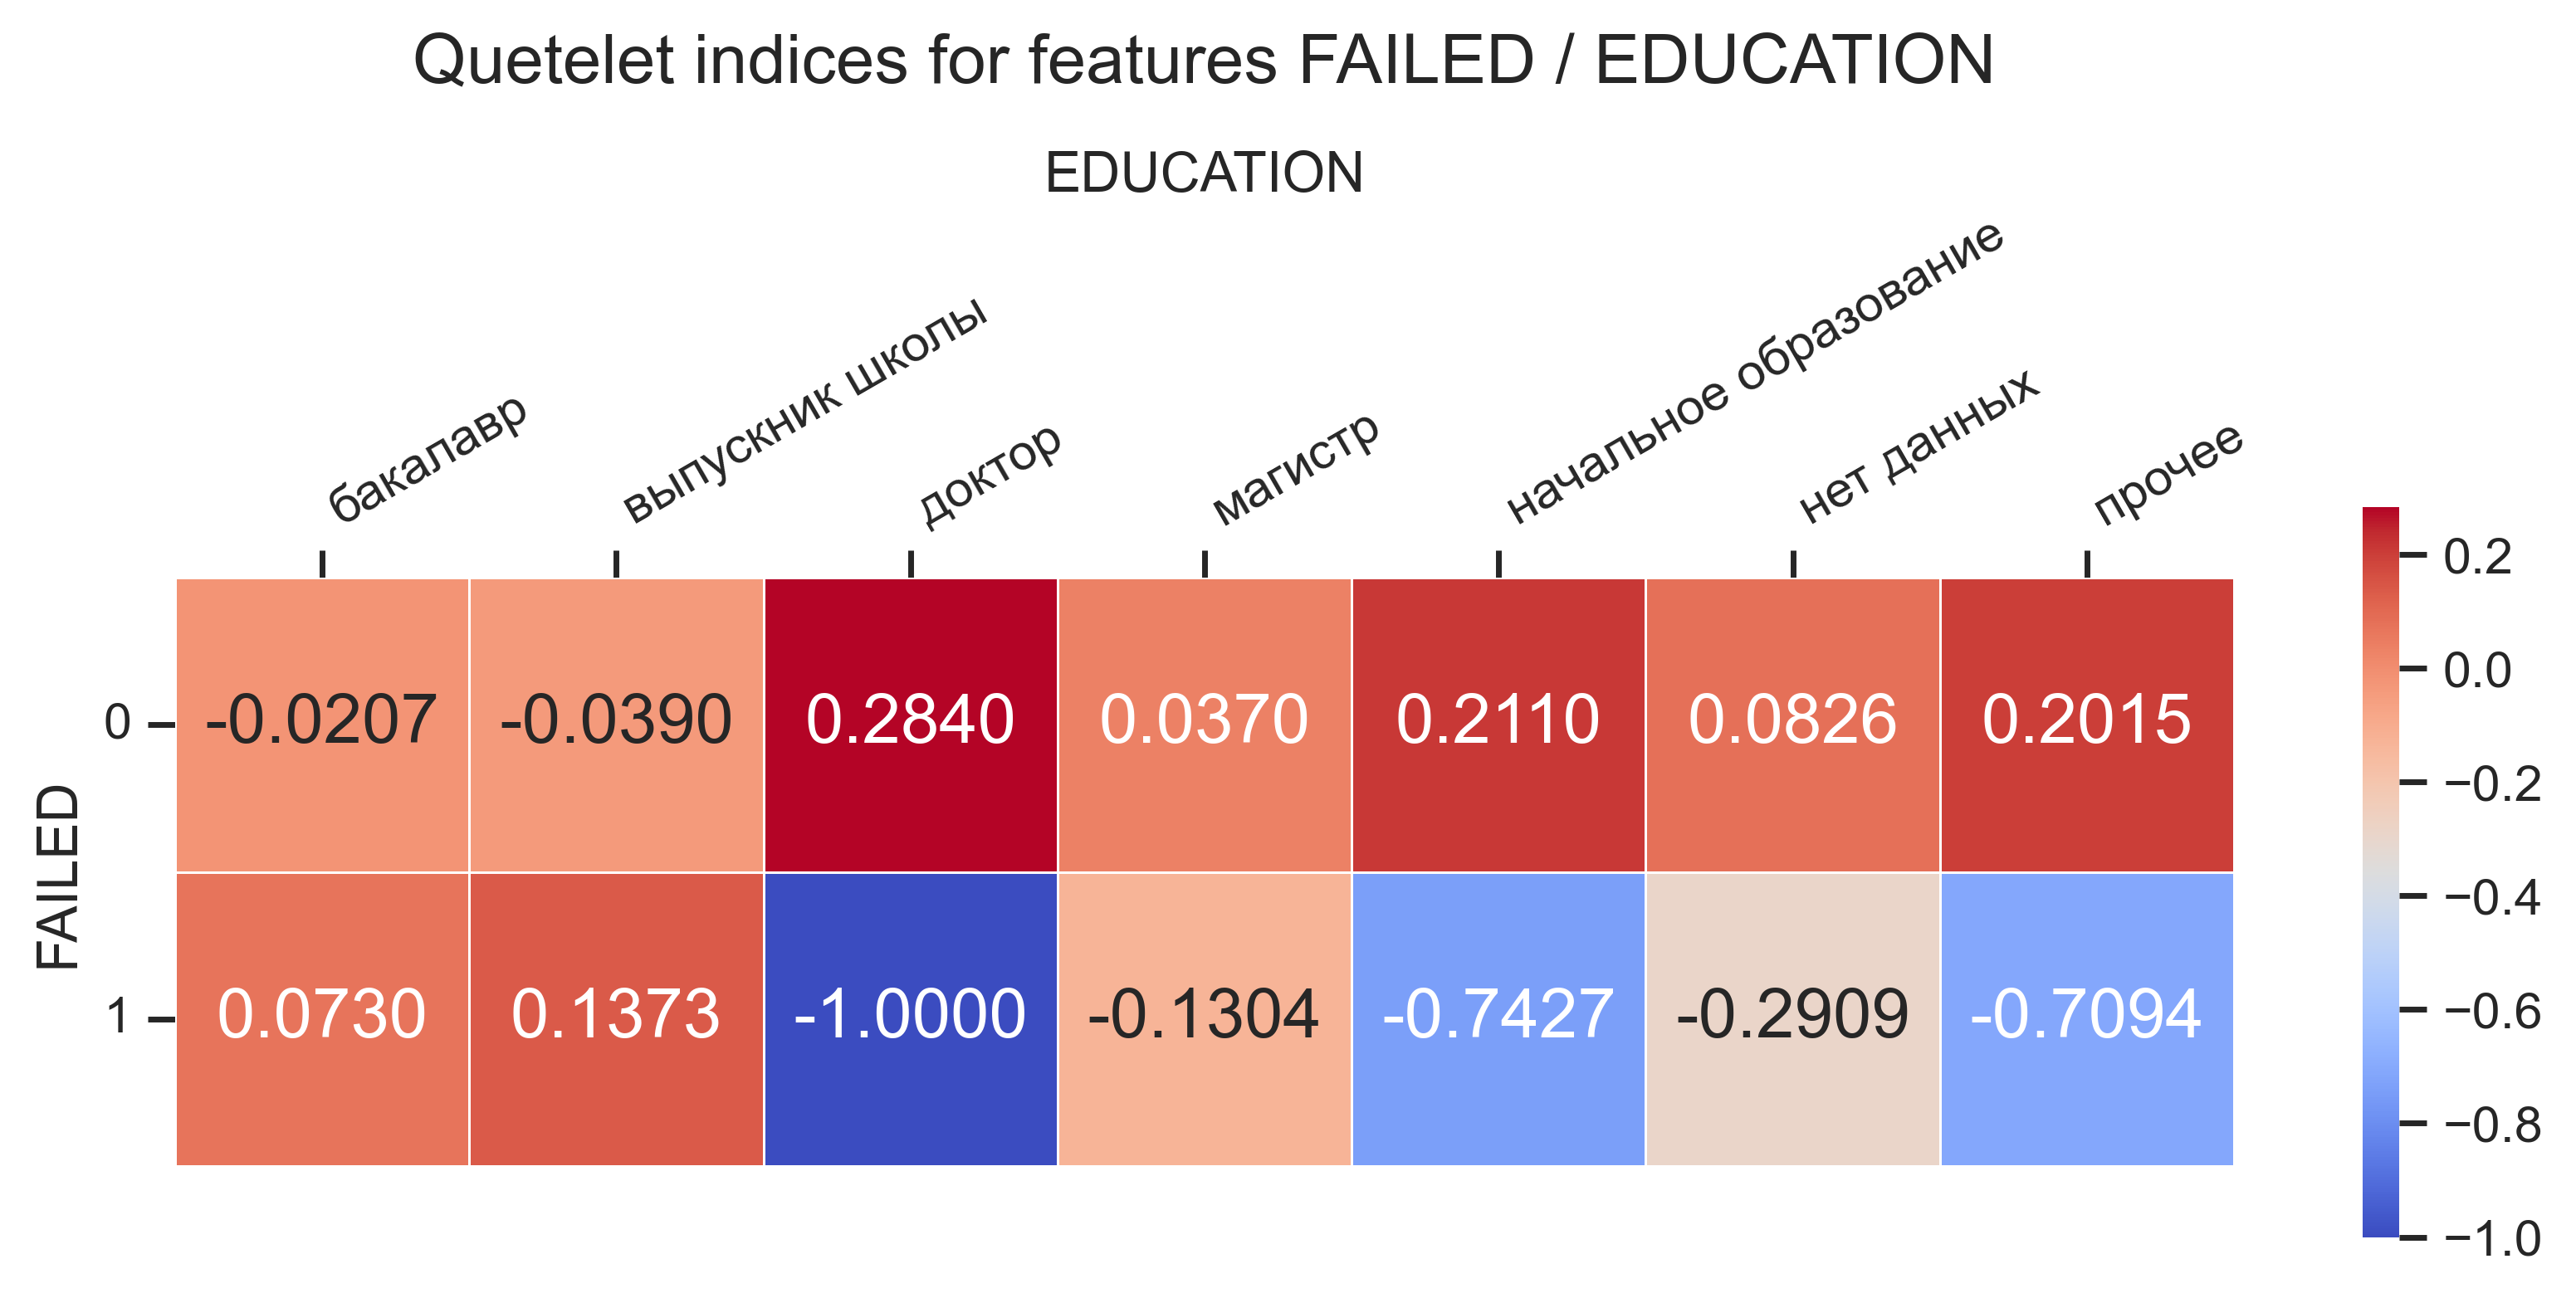

In [2]:
from sberpunk.quetelet_index import QueteletIndex
q = QueteletIndex(data.EDUCATION, data.FAILED)
q.plot()

То же датафреймом:

In [3]:
q.qtable

EDUCATION,бакалавр,выпускник школы,доктор,магистр,начальное образование,нет данных,прочее
FAILED,,,,,,,
0,-0.020735,-0.039004,0.284027,0.037047,0.210952,0.082611,0.201482
1,0.073004,0.137324,-1.000000,-0.130436,-0.742719,-0.290856,-0.709377


Таблица сопряженности (перекрестная классификация):

In [4]:
q.crosstab

EDUCATION,бакалавр,выпускник школы,доктор,магистр,начальное образование,нет данных,прочее
FAILED,,,,,,,
0,10700,3680,14,8549,116,43,262
1,3330,1237,0,2036,7,8,18


Нормализованная таблица сопряженности с маргинальными полями:

In [5]:
q.crosstab_marg_norm

EDUCATION,бакалавр,выпускник школы,доктор,магистр,начальное образование,нет данных,прочее,All
FAILED,,,,,,,,
0,0.356667,0.122667,0.000467,0.284967,0.003867,0.001433,0.008733,0.7788
1,0.111000,0.041233,0.000000,0.067867,0.000233,0.000267,0.000600,0.2212
All,0.467667,0.163900,0.000467,0.352833,0.004100,0.001700,0.009333,1.0000


***
### <a id='toc1_1_3_'></a>[__Как это работает__](#toc0_)

По книге [__"Введение в анализ данных" дтн Миркина Б.Г.__](https://urait.ru/book/vvedenie-v-analiz-dannyh-511121)

На примере клиентов, не вернувших кредит, с уровнем образования _выпускник школы_.

Частота совместного появления этих категорий — значение на пересечении соответствующих строки и столбца, $1237 / 30000 \approx 4.12\%$. В целом доля столбца _выпускник школы_ — $16.39\%$. Значит, частота категории _невозврат кредита_ при условии _заемщик — выпускник школы_, равна $0.041233 / 0.1639 \approx 0.2516 = 25.16\%$.

Это много или мало? Трудно сказать, если не сравнить данное значение с безусловной вероятностью — частотой появления категории _невозврат кредита_ на всем множестве данных, равной $22.12\%$. Посчитаем относительную разницу
между условной и безусловной вероятностями, которая называется __индексом Кетле__:

$$\large q(\texttt{FAILED} = 1 \; | \; \texttt{EDUCATION} = \texttt{"выпускник школы"}) = \frac{0.2516 - 0.2212}{0.2212} \approx 0.1373 = 13.73\%.$$

Это значит, что условие _заемщик — выпускник школы_ повышает частоту категории _невозврат кредита_ на $13.73\%$ по сравнению со средней. Индекс Кетле показывает, на сколько процентов условная вероятность строки (столбца) в таблице сопряженности отличается от ее безусловной вероятности; чем он больше, тем выше связь категориальных признаков. Обратим внимание, что индекс Кетле сравнивает условную вероятность категории с безусловной, а не с той, которая получается при противоположном условии.

***
### <a id='toc1_1_4_'></a>[__Выводы__](#toc0_)

* Наиболее тревожным, с точки зрения `FAILED`, значением признака `EDUCATION` является значение _выпускник школы_: реализация `EDUCATION="выпускник школы"` повышает частоту реализации `FAILED=1` на $13.73\%$ по сравнению со средней.

* Наиболее оптимистичным значением признака `EDUCATION` — индикатором того, что клиент вернет кредит, является значение _доктор_: ни один из $14$ заемщиков-докторов наук не обманул ожиданий банка. Коэффициент Кетле для данной категории `EDUCATION` равен $-1$, что означает стопроцентный возврат кредита. Имеет место наибольшая связь — концептуальная (логическая). Концептуальная связь усматривается тогда, когда в строке $k$ все немаргинальные величины, кроме одной, скажем, в столбце $l$, равны $0$, что означает, что если объект имеет категорию $k$ первого признака, он заведомо будет иметь категорию $l$ второго признака. Это означает логическую импликацию, или концептуальную связь.